<a href="https://colab.research.google.com/github/r-prateek/Bird-Species-Classifier/blob/main/Birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d gpiosenka/100-bird-species
! unzip 100-bird-species.zip -d dataset

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [9]:
train_path = "/content/dataset/train"
test_path = "/content/dataset/test"

In [41]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
)

In [42]:
train_data = datagen.flow_from_directory(
    train_path,
    target_size = (300, 300),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 35215 images belonging to 250 classes.


In [43]:
test_data = datagen.flow_from_directory(
    test_path,
    target_size = (300, 300),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 1250 images belonging to 250 classes.


In [44]:
inception = tf.keras.applications.InceptionResNetV2( 
    include_top = False,
    weights = 'imagenet',
    input_shape = (300, 300, 3)
)

In [ ]:
inception.trainable = False
inception.summary()

In [46]:
model = tf.keras.Sequential()

In [47]:
model.add(inception)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.33))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='softmax'))

In [ ]:
model.summary()

In [49]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
history = model.fit(train_data, validation_data=test_data, epochs = 25)

Epoch 1/25
1101/1101 [==============================] - 218s 190ms/step - loss: 3.5443 - accuracy: 0.2394 - val_loss: 1.3008 - val_accuracy: 0.6008
Epoch 2/25
1101/1101 [==============================] - 206s 187ms/step - loss: 1.8809 - accuracy: 0.4892 - val_loss: 1.0901 - val_accuracy: 0.6776
Epoch 3/25
1101/1101 [==============================] - 206s 187ms/step - loss: 1.5928 - accuracy: 0.5518 - val_loss: 0.8533 - val_accuracy: 0.7392
Epoch 4/25
1101/1101 [==============================] - 206s 187ms/step - loss: 1.4529 - accuracy: 0.5873 - val_loss: 0.8173 - val_accuracy: 0.7432
Epoch 5/25
1101/1101 [==============================] - 206s 187ms/step - loss: 1.3654 - accuracy: 0.6088 - val_loss: 0.7476 - val_accuracy: 0.7712
Epoch 6/25
1101/1101 [==============================] - 206s 187ms/step - loss: 1.3028 - accuracy: 0.6246 - val_loss: 0.6612 - val_accuracy: 0.7936
Epoch 7/25
1101/1101 [==============================] - 206s 187ms/step - loss: 1.2208 - accuracy: 0.6445 - val_

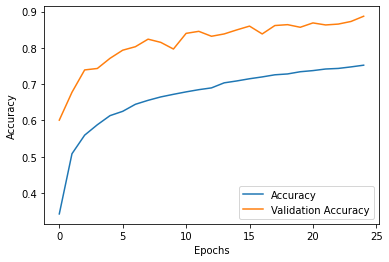

In [52]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")

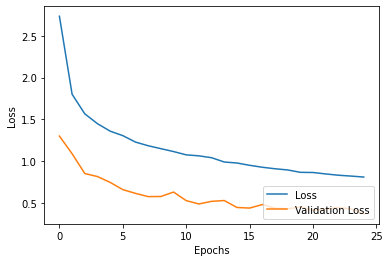

In [53]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "lower right")

In [56]:
model.save('birds2.h5')